# Name : Aviel Danin


In [435]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statistics as stat
from sklearn.preprocessing import StandardScaler
import random
import re
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
filepath = "path"

In [668]:
# Image design for slide 2 in powerpoint
df = pd.read_excel("path",sheet_name='יהודים',skiprows=12,index_col=None)
df2 = df.iloc[:10,]
a = ['יהודים','יהודיות','מוסלמים','מוסלמיות','נוצרים','נוצריות','דרוזים','דרוזיות','אחרים','אחרות']
df2.insert(0, 'סוגי אוכלוסיות', np.array(a))
df2['שם פרטי'] = ["משה", "מיכל" ,"אחמד" ,"פאטמה"," אליאס" ,"מריה"," עמיר", "נור" ,"דניאל", "סיוון" ]
df2['סך הכל בשנים\n1948-2021']
df2 = df2.rename(columns={'סך הכל בשנים\n1948-2021':'סה"כ לידות :1948-2022'})
df2.insert(1, 'pop_type', np.array(['jewM' ,'jewF','muslimM', 'muslimF' ,'christianM','christianF','druzeM','druzeF','anotherM','anotherF']))
df2

C:\Users\aviel\AppData\Local\Temp\ipykernel_8336\668378382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['שם פרטי'] = ["משה", "מיכל" ,"אחמד" ,"פאטמה"," אליאס" ,"מריה"," עמיר", "נור" ,"דניאל", "סיוון" ]


,סוגי אוכלוסיות,pop_type,שם פרטי,"סה""כ לידות :1948-2022",1948,1949,1950,1951,1952,1953,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,יהודים,jewM,משה,179,.,6,..,..,8,..,...,..,..,..,..,..,..,..,..,..,..
1,יהודיות,jewF,מיכל,9047,34,49,53,79,92,80,...,9,10,10,11,9,10,..,..,13,10
2,מוסלמים,muslimM,אחמד,29,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,מוסלמיות,muslimF,פאטמה,523,.,.,.,.,.,.,...,11,14,18,19,31,25,22,27,27,32
4,נוצרים,christianM,אליאס,5734,..,..,..,..,..,..,...,161,163,260,314,297,274,231,222,178,180
5,נוצריות,christianF,מריה,11696,..,..,..,..,8,7,...,329,342,355,280,264,297,345,382,342,376
6,דרוזים,druzeM,עמיר,1109,19,16,23,26,23,30,...,7,29,21,17,14,23,23,33,30,29
7,דרוזיות,druzeF,נור,101,.,.,..,..,..,.,...,.,..,..,..,..,..,..,.,.,.
8,אחרים,anotherM,דניאל,397,.,.,..,..,..,..,...,..,9,..,9,5,..,8,..,..,..
9,אחרות,anotherF,סיוון,31,.,.,.,.,.,.,...,.,.,.,.,..,.,.,.,.,.


In [4]:
# Returns the df to the entire population
def beck_df(sheet_name) :
    df = pd.read_excel("path",sheet_name=sheet_name,index_col=None)
    df.columns = [str(i) for i in df.iloc[11,:]]
    df.rename(columns={'סך הכל בשנים\n1948-2021':'all years'}, inplace=True)
    df = df.iloc[12:,:]
    df.reset_index(inplace=True)
    df.drop(['index'] , axis=1 , inplace=True)
    df.rename(columns={'שם פרטי':'firstName'}, inplace=True)
    df.replace(['.','..'],[0,2.5],inplace=True)
    df.set_index('firstName' , inplace=True)
    return df

In [367]:
# save all the types of df to variable
jewM = beck_df('יהודים')
jewF = beck_df('יהודיות')
muslimM = beck_df('מוסלמים')
muslimF = beck_df('מוסלמיות')
christianM = beck_df('נוצרים')
christianF = beck_df('נוצריות')
druzeM = beck_df('דרוזים')
druzeF = beck_df('דרוזיות')
anotherM = beck_df('אחרים')
anotherF = beck_df('אחרות')

In [7]:
dfs = [jewM ,jewF,muslimM, muslimF ,christianM,christianF,druzeM,druzeF,anotherM,anotherF]
df_st = ['jewM' ,'jewF','muslimM', 'muslimF' ,'christianM','christianF','druzeM','druzeF','anotherM','anotherF']

In [8]:
def sum_allYears(ls,col):
    total = 0
    for i in ls :
        total = i[col].sum() +total
    return total

In [9]:
dfs_men = [jewM ,muslimM ,christianM,druzeM,anotherM]
totalM = sum_allYears(dfs_men , 'all years')

dfs_female = [jewF,muslimF,christianF,druzeF,anotherF]
totalF = sum_allYears(dfs_female, 'all years')

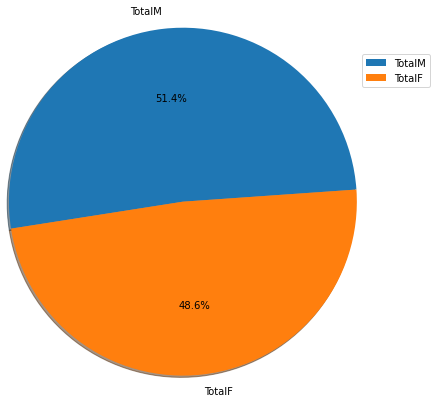

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =['TotalM' ,'TotalF']
sizes = [totalM,totalF]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=4 , radius=2,textprops = {"fontsize":10})

plt.legend(bbox_to_anchor =(1.3,1.2))
plt.show()

In [13]:
def sum_eachType(ls,col):
    total = []
    for i in ls:
        total.append(i[col].sum())
    return total

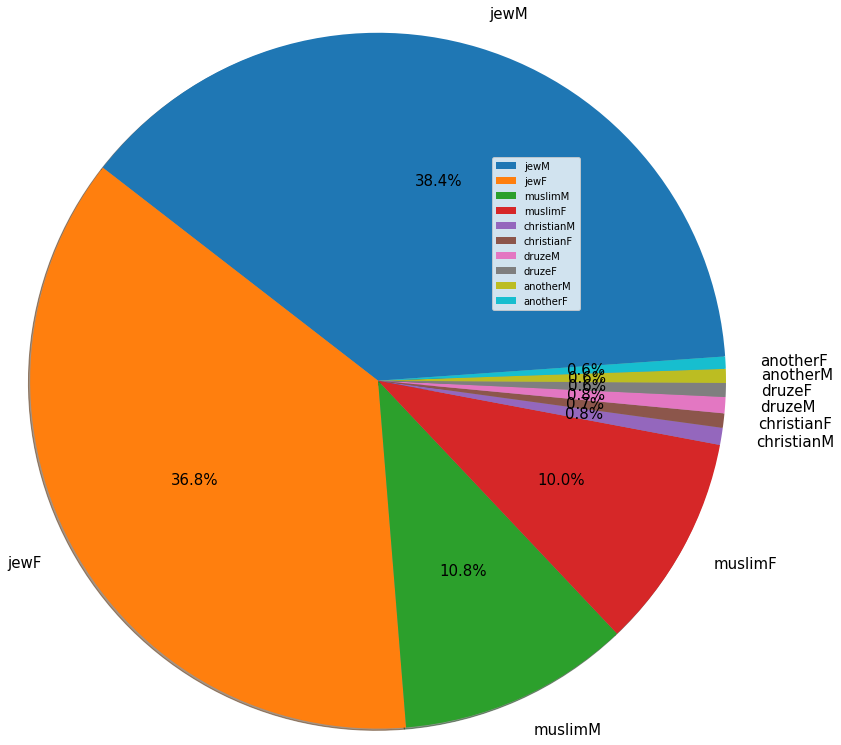

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =['jewM' ,'jewF','muslimM', 'muslimF' ,'christianM','christianF','druzeM','druzeF','anotherM','anotherF']
sizes = sum_eachType(dfs,'all years')
explode = (0, 0, 0, 0, 0,0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=4 , radius=4,textprops = {"fontsize":15})

plt.legend(bbox_to_anchor =(1,0.8))
plt.show()

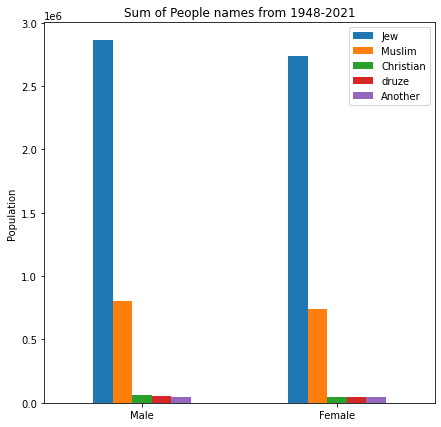

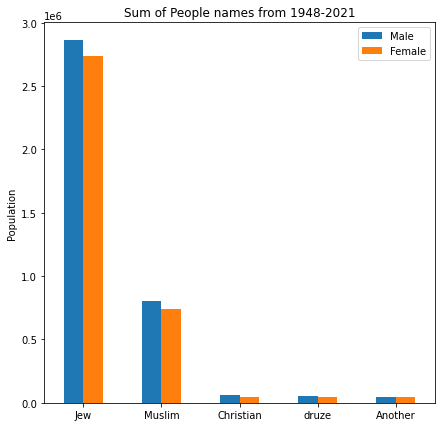

In [15]:
df = pd.DataFrame({"Jew": [jewM['all years'].sum(), jewF['all years'].sum()],
                   "Muslim": [muslimM['all years'].sum(), muslimF['all years'].sum()],
                   "Christian": [christianM['all years'].sum(), christianF['all years'].sum()], 
                   "druze": [druzeM['all years'].sum(), druzeF['all years'].sum()] ,
                 'Another' : [anotherM['all years'].sum() ,anotherF['all years'].sum()]}).set_index([['Male','Female']])
df.plot(kind="bar" , figsize =(7,7))
plt.xticks(rotation=0)
plt.title('Sum of People names from 1948-2021')
plt.ylabel('Population')
plt.show()



df2 = pd.DataFrame({'Male' :sum_eachType(dfs_men,'all years'),'Female': sum_eachType(dfs_female,'all years')}).set_axis(["Jew","Muslim","Christian","druze",'Another'])
df2.plot(kind="bar", figsize =(7,7))
plt.xticks(rotation=0)
plt.title('Sum of People names from 1948-2021')
plt.ylabel('Population')
plt.show()

Text(0.5, 0, 'Years : 1948 - 2021')

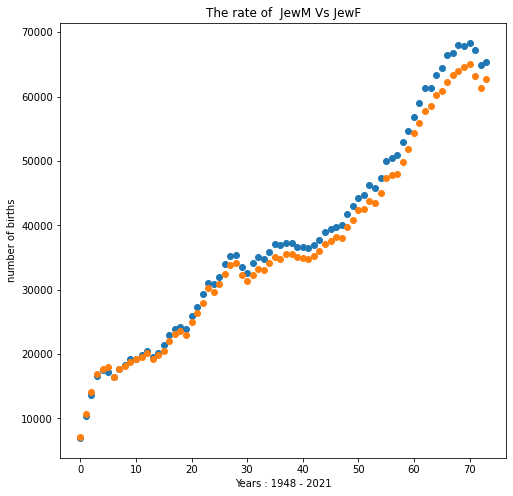

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(range(len(jewM.sum()[1:])),jewM.sum()[1:])
plt.scatter(range(len(jewF.sum()[1:])),jewF.sum()[1:])
plt.title("The rate of  JewM Vs JewF")
plt.ylabel('number of births')
plt.xlabel('Years : 1948 - 2021')

In [18]:
y0 = jewM.sum()[1:]
y1 = jewF.sum()[1:]
dy = y0-y1 ; # error 
abs_dy = abs(y0-y1)    # absolute error 
relerr = abs(y0-y1)/y0 ; # relative error 
pererr = (abs(y0-y1)/y0)*100 #   % percentage error 

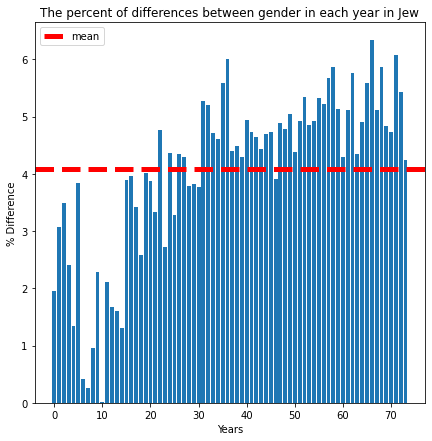

In [19]:
plt.figure(figsize=(7,7))
plt.axhline(y=np.nanmean(pererr), color='red', linestyle='--', linewidth=5 , label = 'mean')

plt.legend()


plt.bar(range(len(pererr.index)),pererr.values)
plt.xlabel('Years')
plt.ylabel('% Difference')
plt.title('The percent of differences between gender in each year in Jew')
plt.show()

Text(0.5, 0, 'Years : 1948 - 2021')

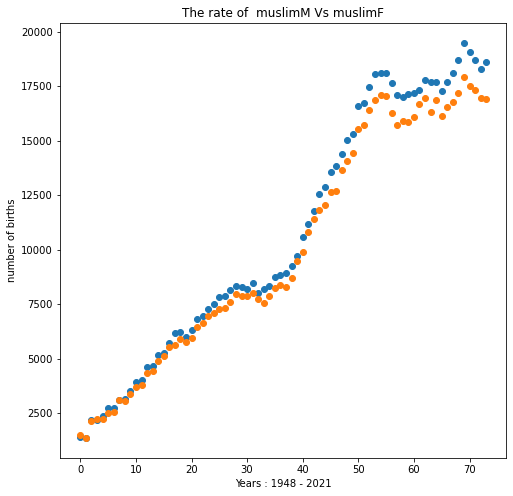

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(range(len(muslimM.columns[1:])),muslimM.sum()[1:])
plt.scatter(range(len(muslimF.columns[1:])),muslimF.sum()[1:])
plt.title("The rate of  muslimM Vs muslimF")
plt.ylabel('number of births')
plt.xlabel('Years : 1948 - 2021')

In [22]:
y0 = muslimM.sum()[1:]
y1 = muslimF.sum()[1:]
dy = y0-y1 ; # error 
abs_dy = abs(y0-y1)    # absolute error 
relerr = abs(y0-y1)/y0 ; # relative error 
pererr = (abs(y0-y1)/y0)*100 #   % percentage error 

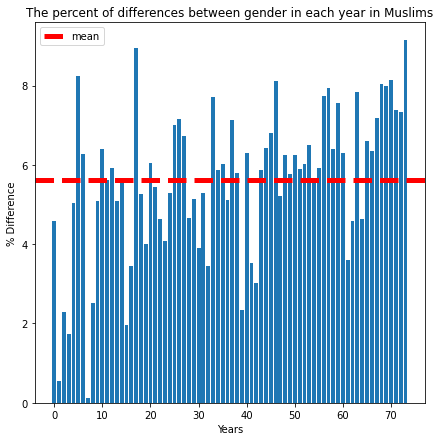

In [24]:
plt.figure(figsize=(7,7))
plt.axhline(y=np.nanmean(pererr), color='red', linestyle='--', linewidth=5 , label = 'mean')

plt.legend()


plt.bar(range(len(pererr.index)),pererr.values)
plt.xlabel('Years')
plt.ylabel('% Difference')
plt.title('The percent of differences between gender in each year in Muslims')
plt.show()

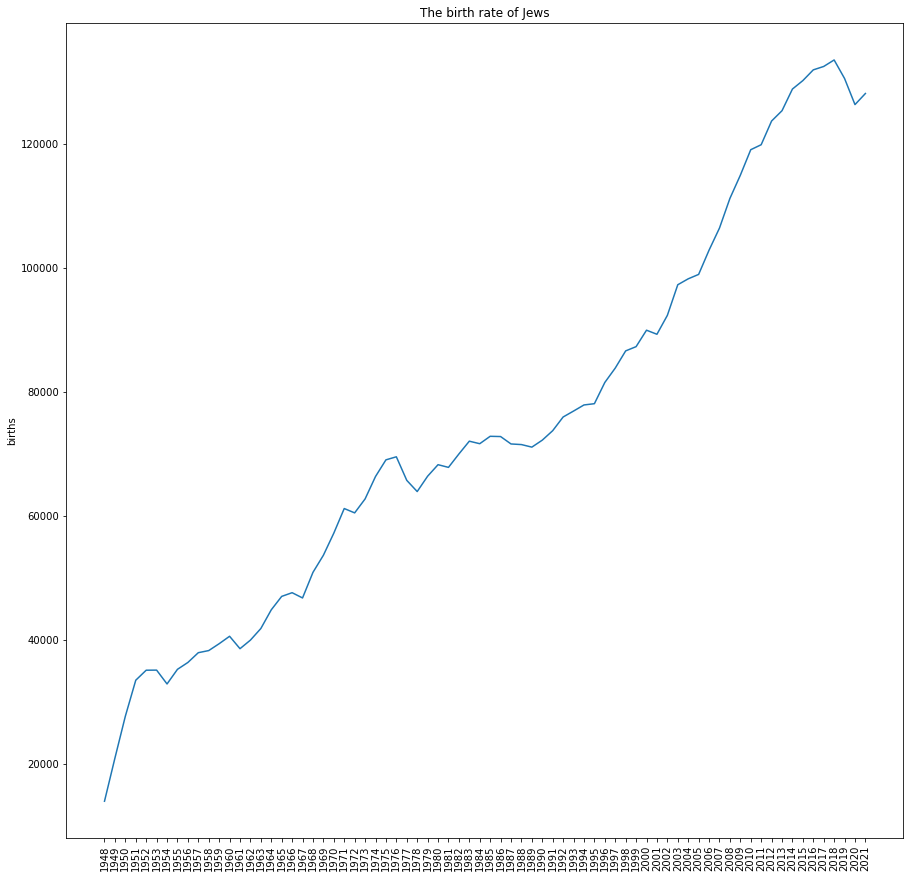

In [812]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.plot(jewM.sum()[1:].index,(jewM.sum()[1:]+jewF.sum()[1:]).values)
plt.ylabel('births')
plt.title('The birth rate of Jews')
plt.show()

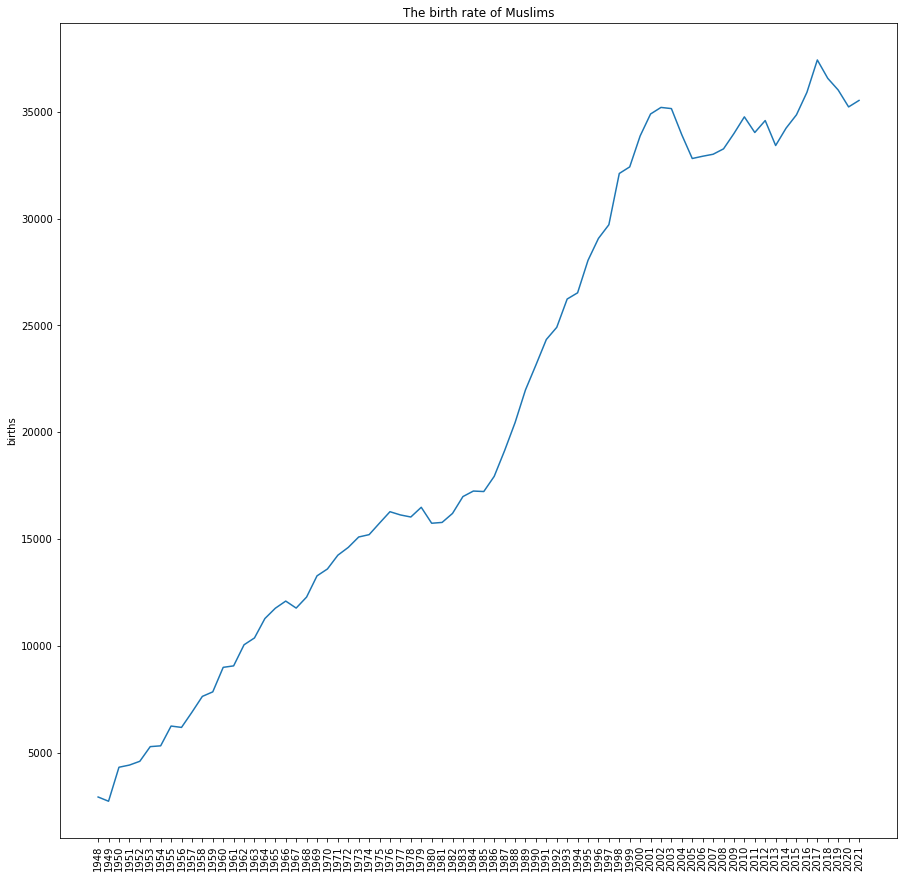

In [813]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.plot(muslimM.sum()[1:].index,(muslimM.sum()[1:]+muslimF.sum()[1:]).values)
plt.ylabel('births')
plt.title('The birth rate of Muslims')
plt.show()

In [679]:
names = []
numbers = []
for df in dfs :
    for name in (df.iloc[:,1:].T.sum().reset_index()).sort_values(by = 0 , ascending = False)[:5]['firstName'] :
        names.append(name)
    for num in (df.iloc[:,1:].T.sum().reset_index()).sort_values(by = 0 , ascending = False)[:5][0] :
        numbers.append(num)


In [680]:
types = ['jewM']*5 + ['jewF']*5 + ['muslimM']*5 + ['muslimF']*5 + ['christianM']*5 + ['christianF']*5 + ['druzeM']*5 + ['druzeF']*5 +  ['anotherM']*5 + ['anotherf']*5
nnt = pd.DataFrame({'type' : types , 'name' : names , 'number' : numbers})

Text(0.5, 1.0, 'prediction by PolynomialLine')

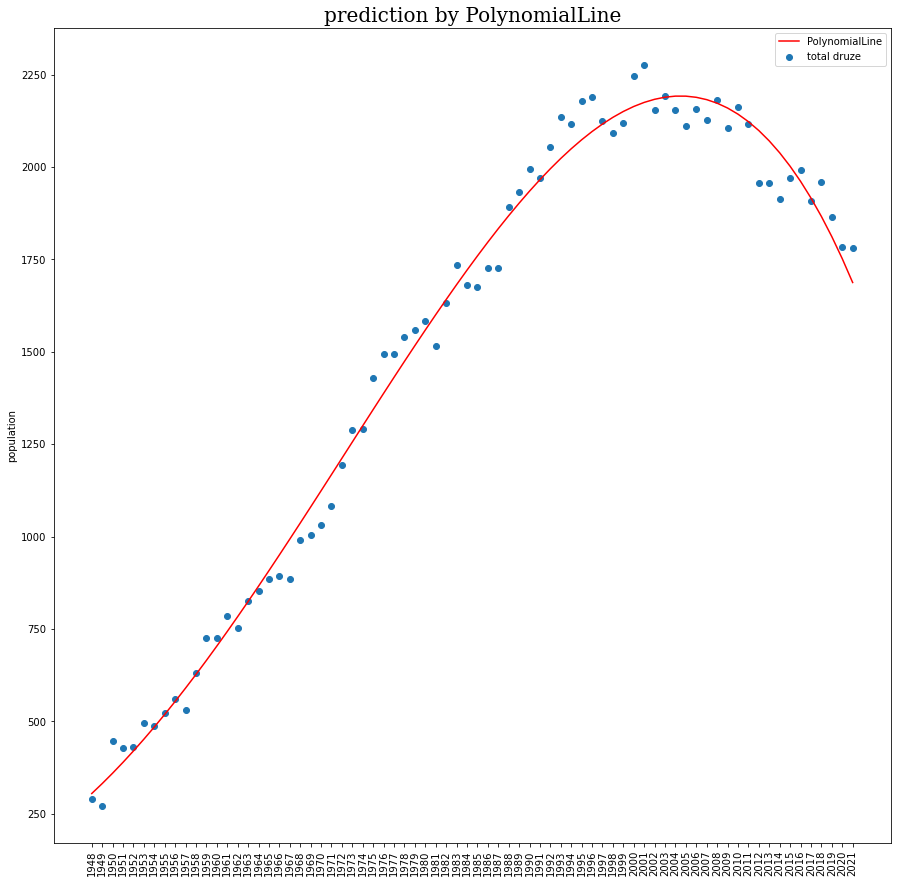

In [934]:
X = druzeM.sum()[1:].index.values.reshape(-1,1)
y = druzeF.sum()[1:] +druzeM.sum()[1:]

poly_reg = PolynomialFeatures(degree = 15)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)

plt.plot(lin_reg_2.predict(X_poly), color='r')
plt.scatter(y.index,y.values )
plt.legend(['PolynomialLine','total druze'])
plt.ylabel("population")
plt.title("prediction by PolynomialLine" , fontdict={'family':'serif','color':'black','size':20})

Text(0.5, 1.0, 'prediction by PolynomialLine')

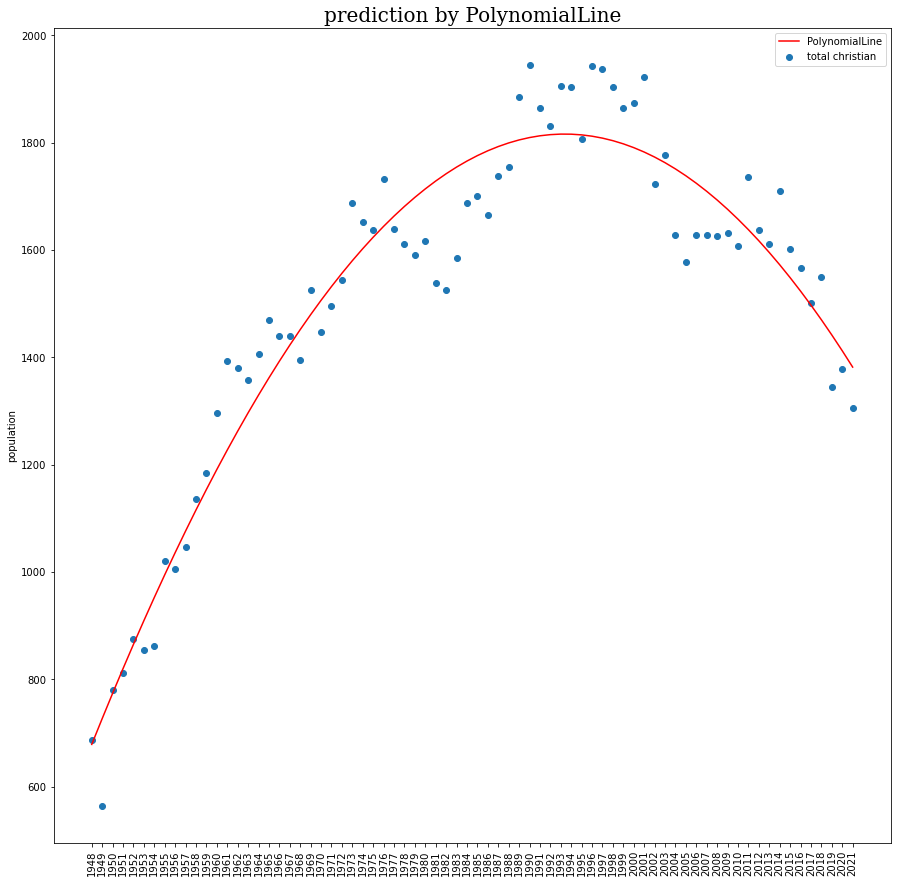

In [935]:
X = christianM.sum()[1:].index.values.reshape(-1,1)
y = christianM.sum()[1:] +christianF.sum()[1:]

poly_reg = PolynomialFeatures(degree = 20)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)

plt.plot(lin_reg_2.predict(X_poly), color='r')
plt.scatter(y.index,y.values)
plt.legend(['PolynomialLine','total christian'])
plt.ylabel("population")
plt.title("prediction by PolynomialLine" , fontdict={'family':'serif','color':'black','size':20})

C:\Users\aviel\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

C:\Users\aviel\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



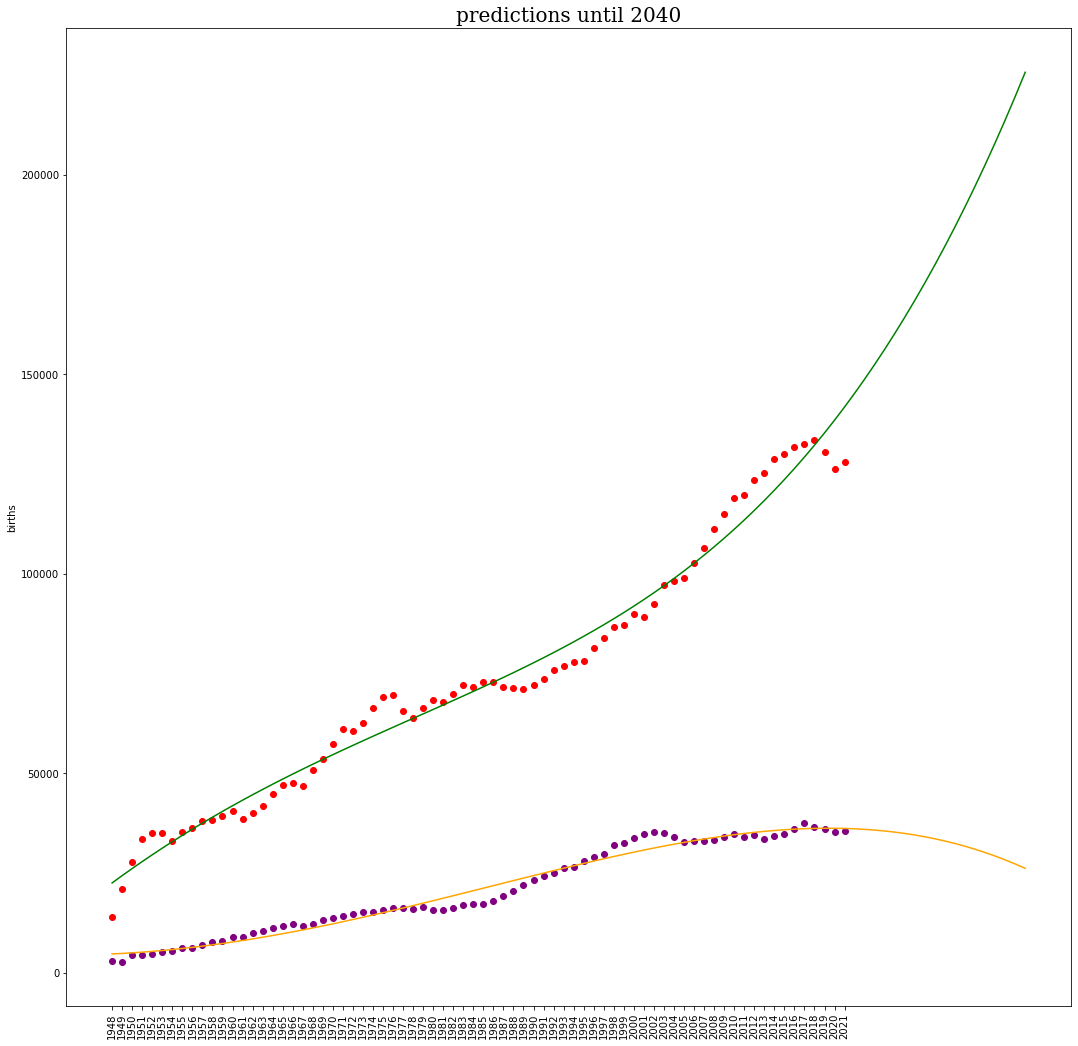

In [933]:
X = jewM.sum()[1:].index.values.reshape(-1,1)
y = jewM.sum()[1:] + jewF.sum()[1:]

poly_reg = PolynomialFeatures(degree = 15)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
x_pred = poly_reg.fit_transform([[str(i)] for i in range(1948,2040,1)])
plt.figure(figsize=(18,18))
plt.xticks(rotation = 90)
plt.title("predictions until 2040" , fontdict={'family':'serif','color':'black','size':20})
plt.ylabel("births")

plt.plot(lin_reg_2.predict(x_pred) , color = 'green')
plt.scatter(y.index,y.values , color='red')

X = muslimM.sum()[1:].index.values.reshape(-1,1)
y = muslimM.sum()[1:] + muslimF.sum()[1:] 

poly_reg = PolynomialFeatures(degree = 15)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.values)
x_pred = poly_reg.fit_transform([[str(i)] for i in range(1948,2040,1)])
    
plt.plot(lin_reg_2.predict(x_pred), color = 'orange')
plt.scatter(y.index,y.values, color = 'purple')


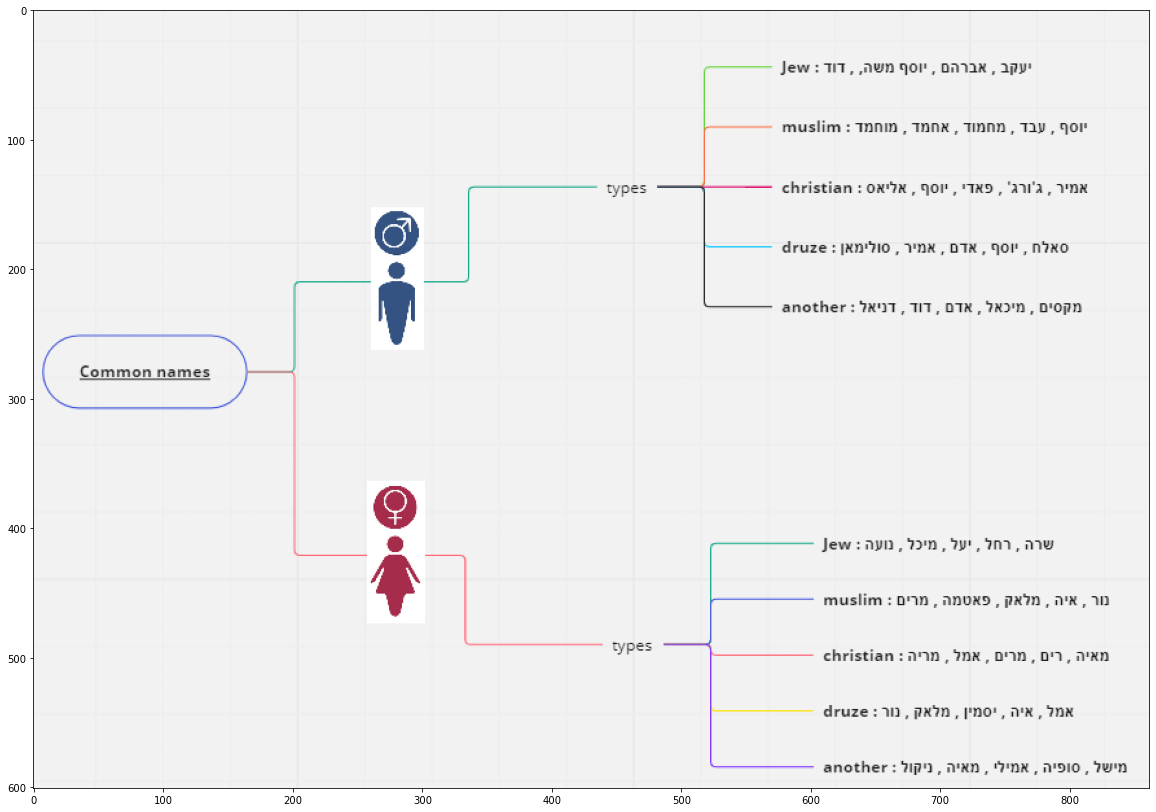

In [28]:

img = mpimg.imread(r"C:\Users\aviel\Desktop\tree_population.PNG")
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)

plt.show()

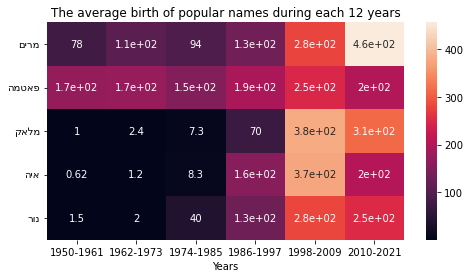

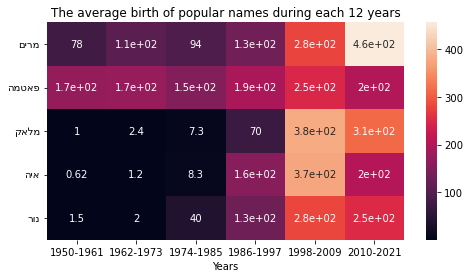

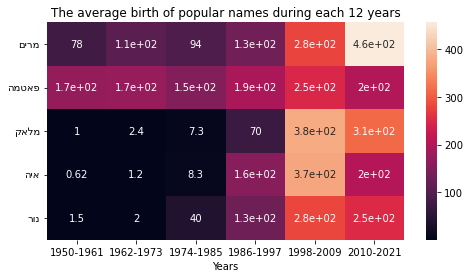

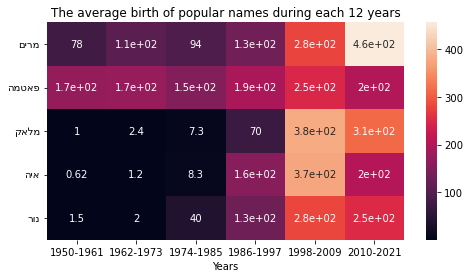

In [803]:
for df in dfs[:4]:
    # Set the width and height of the figure
    plt.figure(figsize=(8,4))
    
    # Add title
    plt.title("The average birth of popular names during each 12 years")
    m = (df.iloc[:,1:].T.sum().reset_index()).sort_values(by = 0 , ascending = False)[:5]['firstName'].values
    table_data = df.T[3:][m]
    table_data2 = table_data.groupby(np.arange(len(table_data))//12).mean()
    table_data2.columns = [i[::-1] for i in table_data2.columns]
    table_data2.set_index([['1950-1961','1962-1973','1974-1985','1986-1997','1998-2009','2010-2021']] , inplace=True)
    # Heatmap showing average arrival delay for each airline by month
    sns.heatmap(data=flight_data2.T, annot=True)
                
    # Add label for horizontal axis
    plt.yticks(rotation = 0)
    plt.xlabel("Years")


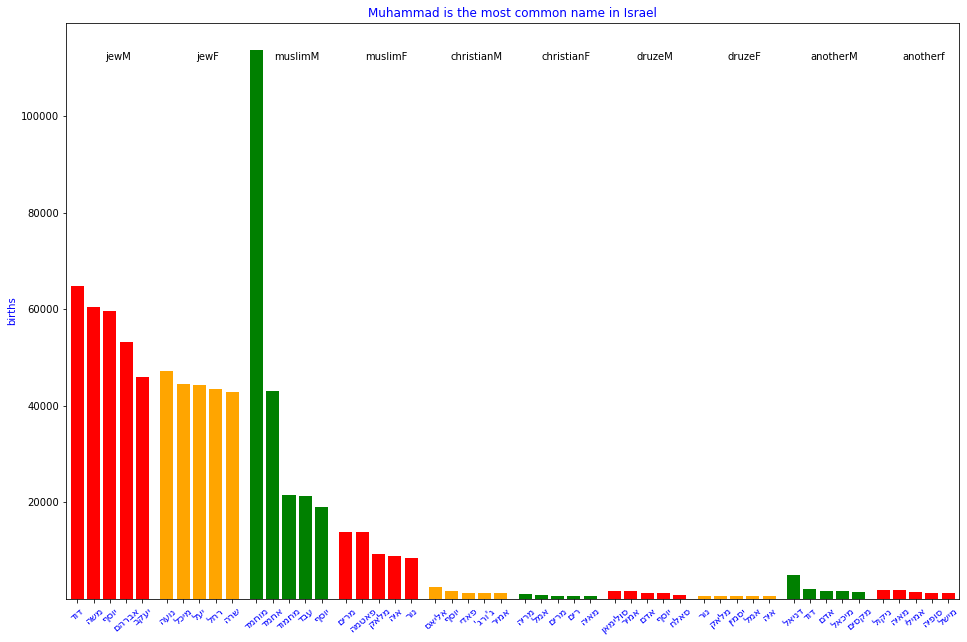

<Figure size 1080x1080 with 0 Axes>

In [689]:
# first create some test data, similar in structure to the question's
df = nnt
df['name'] = [i[::-1] for i in nnt['name'].values]

fig, ax = plt.subplots()
start = 0 # position for first label
gap = 0.5 # gap between labels
labels = [] # list for all the labels
label_pos = np.array([]) # list for all the label positions

# loop through the categories of the dataframe
# provide a list of colors (at least as long as the expected number of categories)
for (cat, df_cat), color in zip(df.groupby('type', sort=False), ['red', 'orange' , 'green'] * len(df)):
    num_in_cat = len(df_cat)
    # add a text for the category, using "axes coordinates" for the y-axis
    ax.text(start + num_in_cat / 2, 0.95, cat, ha='center', va='top', transform=ax.get_xaxis_transform())
    # positions for the labels of the current category
    this_label_pos = np.arange(start, start + num_in_cat)
    # create bars at the desired positions
    ax.bar(this_label_pos, df_cat['number'], color=color)
    # store labels and their positions
    labels += df_cat['name'].to_list()
    label_pos = np.append(label_pos, this_label_pos)
    start += num_in_cat + gap
# set the positions for the labels

ax.set_xticks(label_pos)
# set the labels
ax.set_xticklabels(labels, rotation=40 ,color='blue')
# optionally set a new lower position for the y-axis
ax.set_ylim(ymin=9)
# optionally reduce the margin left and right
ax.margins(x=0.005)
plt.tight_layout()
figure_size = plt.gcf().get_size_inches()
factor = 2.5
plt.gcf().set_size_inches(factor * figure_size)
plt.ylabel("births" , color='blue')
plt.title("Muhammad is the most common name in Israel" , color='blue')
plt.figure(figsize=(15,15))

plt.show()

In [735]:
import plotly.express as px
import pandas as pd
nnt['name'] = nnt['name'].apply(lambda x : x[::-1])
fig = px.line_polar(nnt, r='number', theta='name', line_close=True)
fig.update_traces(fill='toself')
fig.show()

C:\Users\aviel\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [624]:
# Common years for males and females in another data
k=[]
for i in anotherF.sum()[1:].index:
    for j in anotherM.sum()[1:].index :
        if i == j :
            k.append(j)

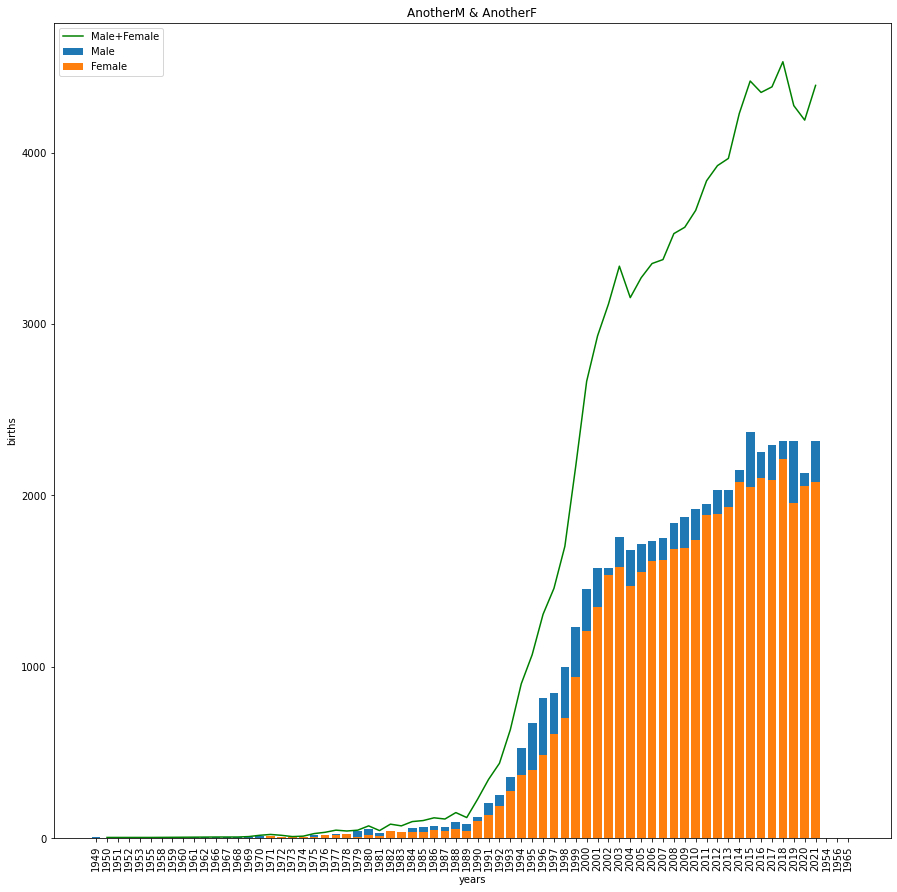

In [623]:
X = anotherF.sum()[1:].index
y = anotherF.sum()[1:].values
X2 = anotherM.sum()[1:].index
y2 = anotherM.sum()[1:].values
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.title("AnotherM & AnotherF")
plt.xlabel("years")
plt.ylabel("births")

plt.bar(X2,y2)
plt.bar(X,y)
plt.plot(k,anotherF[k].sum().values + anotherM[k].sum().values , color='g')
plt.legend(['Male+Female','Male','Female'])

In [515]:
# Bisexual names
l=[]
for i in jewM.index:
    if i in jewF.index:
        l.append(i)

Text(0, 0.5, 'number of names')

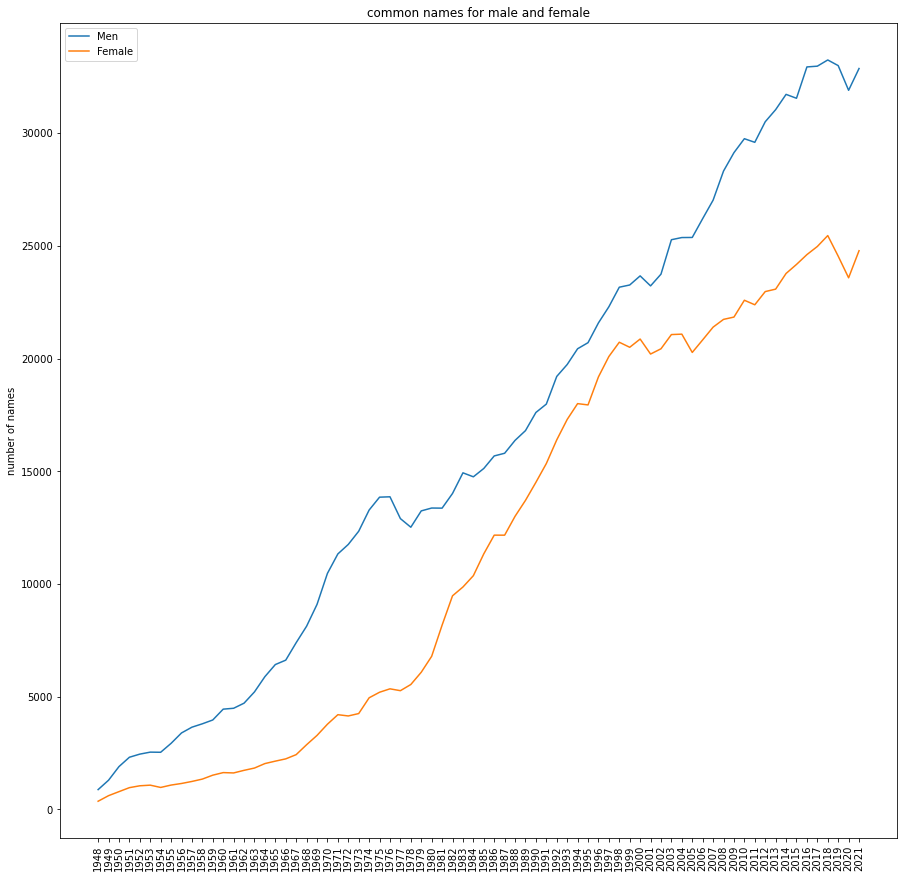

In [546]:

plt.figure(figsize=(15,15))
plt.plot(jewM.loc[l].sum()[1:])
plt.plot(jewF.loc[l].sum()[1:])
plt.legend(['Men','Female'])
plt.title("common names for male and female")
plt.xticks(rotation=90)
plt.ylabel("number of names")


In [880]:
glbl_names =['אוליבר','הארי',"ג'ק","ג'ורג'",'לאו',"צ'רלי"]

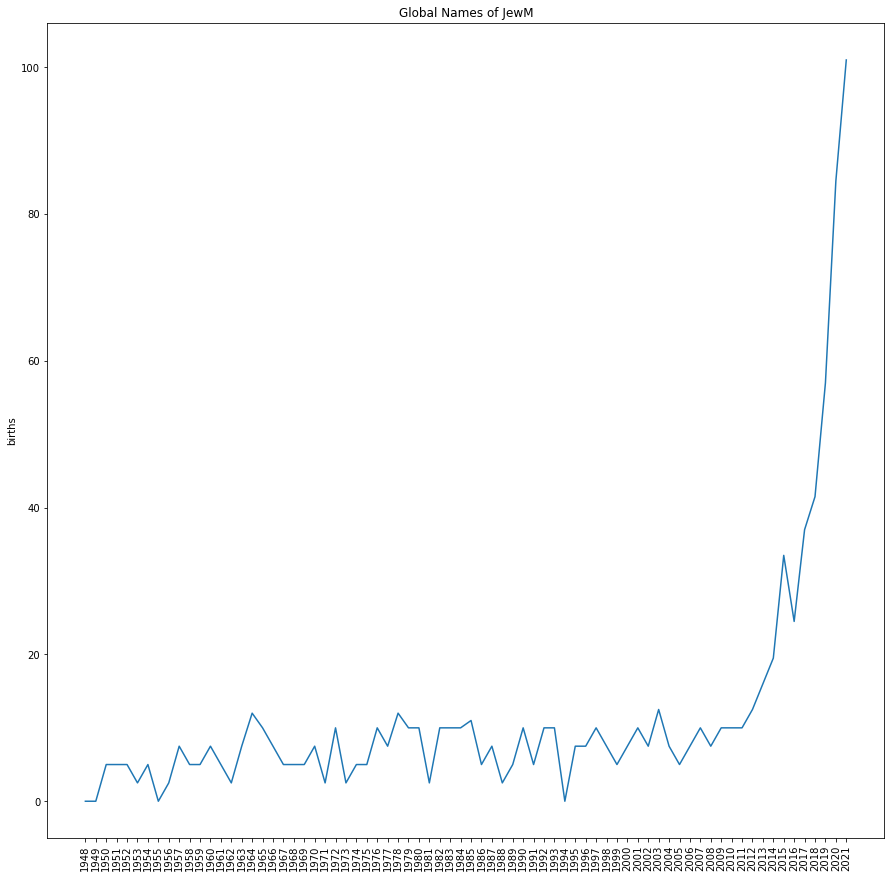

In [888]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.title("Global Names of JewM")
plt.ylabel("births")

plt.plot(jewM.loc[glbl_names].sum()[1:])


Text(0, 0.5, 'amount')

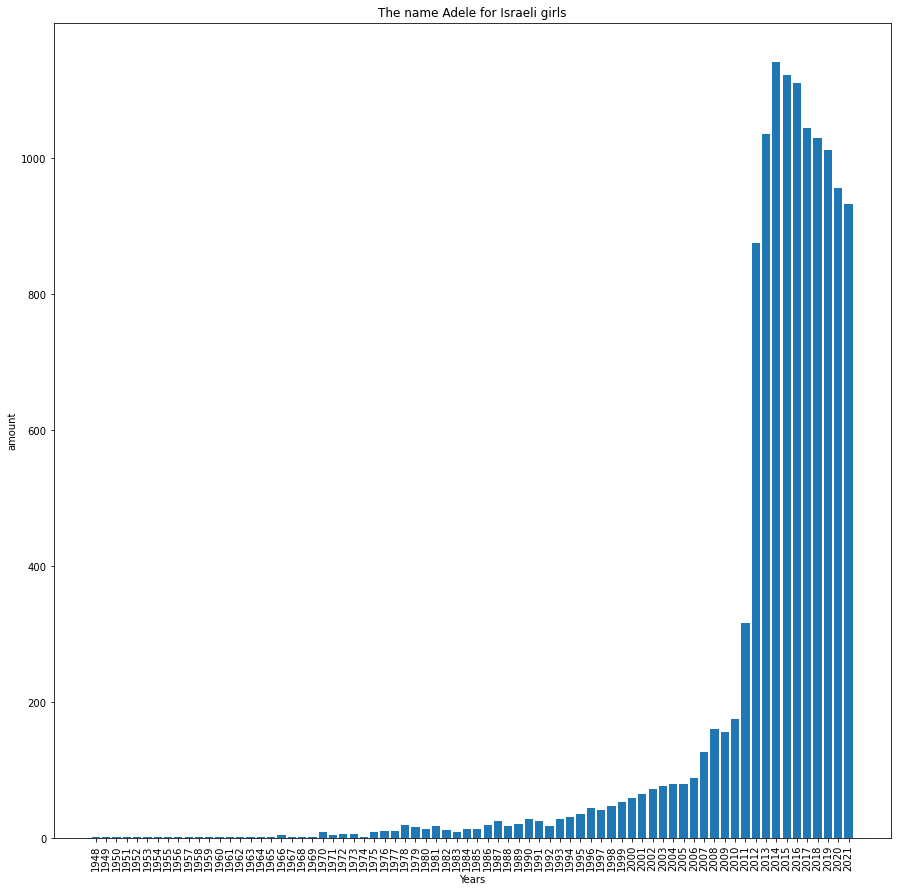

In [86]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
plt.bar(jewF.loc['אדל'][1:].index , jewF.loc['אדל'][1:].values)
plt.title("The name Adele for Israeli girls")
plt.xlabel("Years")
plt.ylabel("amount")
# the singer adele

Text(0, 0.5, 'amount')

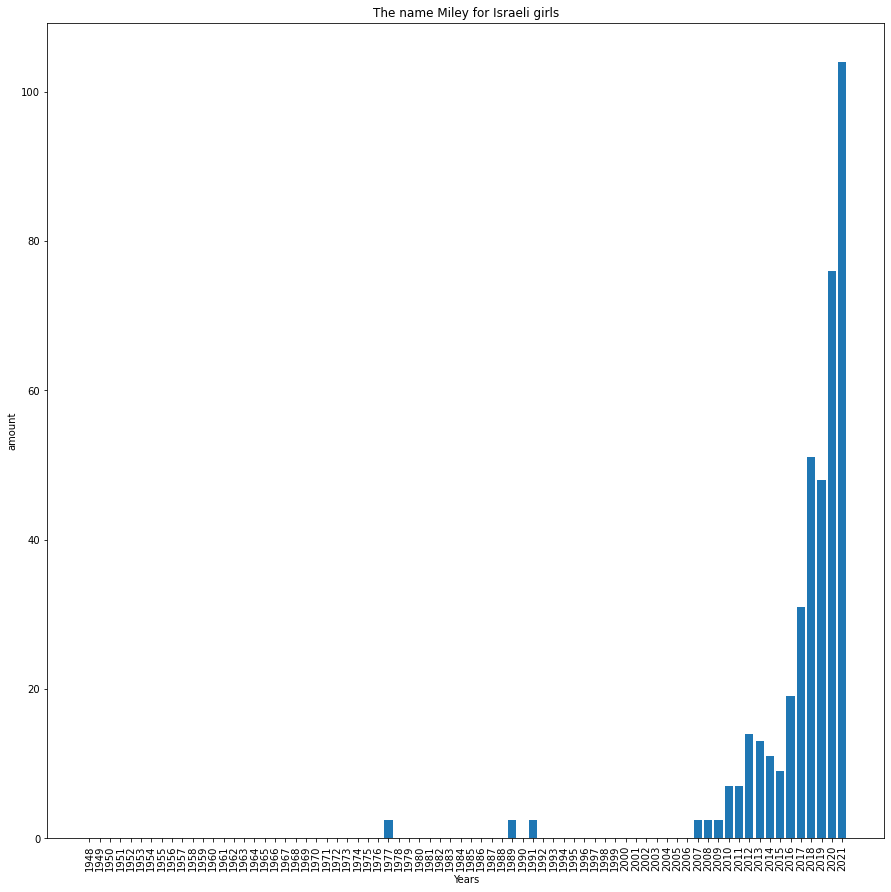

In [87]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
plt.bar(jewF.loc['מיילי'][1:].index , jewF.loc['מיילי'][1:].values)
# milie sairus hanna muntana
plt.title("The name Miley for Israeli girls")
plt.xlabel("Years")
plt.ylabel("amount")

Text(0, 0.5, 'amount')

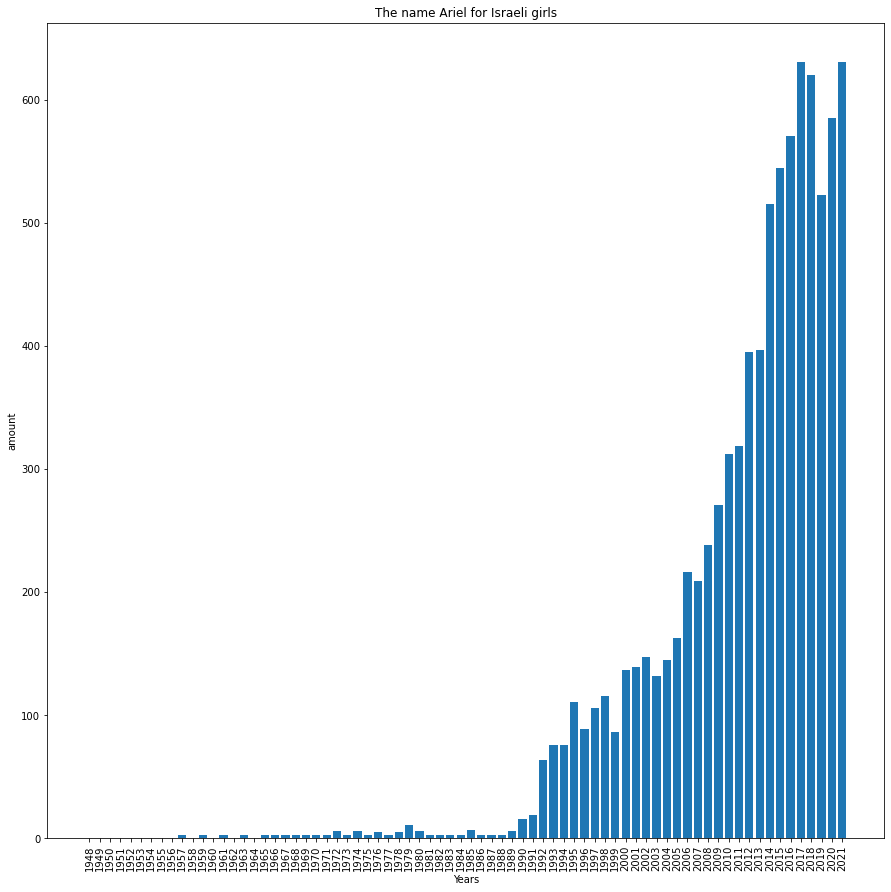

In [88]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)

plt.bar(jewF.loc['אריאל'][1:].index , jewF.loc['אריאל'][1:].values)
plt.title("The name Ariel for Israeli girls")
plt.xlabel("Years")
plt.ylabel("amount")
# the little mermaid

Text(0, 0.5, 'amount')

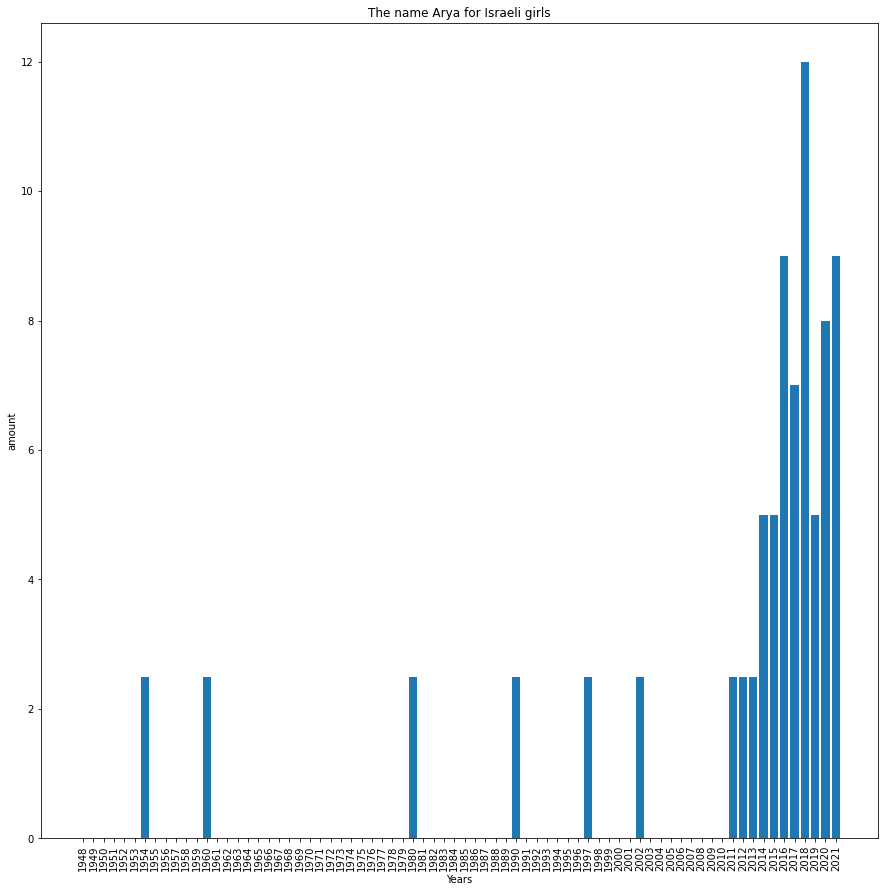

In [89]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
plt.bar(jewF.loc['אריה'][1:].index , jewF.loc['אריה'][1:].values)
plt.title("The name Arya for Israeli girls")
plt.xlabel("Years")
plt.ylabel("amount")
# Game of Thrones
